In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [2]:
data = pickle.load( open( "pickles/a4.p", "rb" ) )

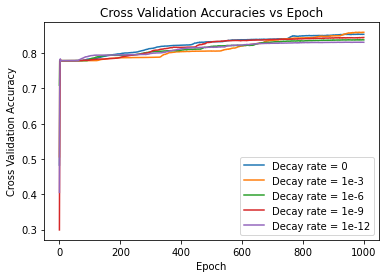

In [4]:
plt.plot(data['model_0'])
plt.plot(data['model_3'])
plt.plot(data['model_6'])
plt.plot(data['model_9'])
plt.plot(data['model_12'])
plt.title('Cross Validation Accuracies vs Epoch')
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Decay rate = 0', 'Decay rate = 1e-3', 'Decay rate = 1e-6', 'Decay rate = 1e-9', 'Decay rate = 1e-12'], loc='lower right')
plt.show()

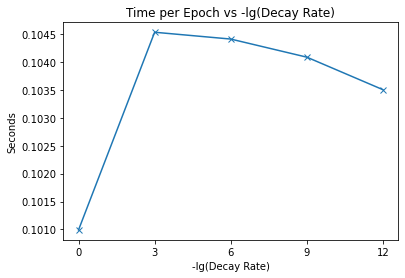

In [8]:
x=[0,3,6,9,12]
plt.plot(x, data['timings'], marker='x')
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title('Time per Epoch vs -lg(Decay Rate)')
plt.ylabel('Seconds')
plt.xlabel('-lg(Decay Rate)')
plt.show()

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [11]:
accuracies_over_time = []
accuracies_over_time.append(("0", data['model_0'][-1]/data['timings'][0], data['model_0'][-1], data['timings'][0], pd.to_timedelta(data['timings'][0]*5000, unit='S')))
accuracies_over_time.append(("1e-3", data['model_3'][-1]/data['timings'][1], data['model_3'][-1], data['timings'][1], pd.to_timedelta(data['timings'][1]*5000, unit='S')))
accuracies_over_time.append(("1e-6", data['model_6'][-1]/data['timings'][2], data['model_6'][-1], data['timings'][2], pd.to_timedelta(data['timings'][2]*5000, unit='S')))
accuracies_over_time.append(("1e-9", data['model_9'][-1]/data['timings'][3], data['model_9'][-1], data['timings'][3], pd.to_timedelta(data['timings'][3]*5000, unit='S')))
accuracies_over_time.append(("1e-12", data['model_12'][-1]/data['timings'][4], data['model_12'][-1], data['timings'][4], pd.to_timedelta(data['timings'][4]*5000, unit='S')))
df = pd.DataFrame(accuracies_over_time, columns =["Decay rate", "Accuracy divided by time", "Final Epoch Accuracy", "Time Per Epoch (seconds)", "Total Time(5-Fold Cross Validation)"])
df

,Decay rate,Accuracy divided by time,Final Epoch Accuracy,Time Per Epoch (seconds),Total Time(5-Fold Cross Validation)
0,0,8.447651,0.853145,0.100992,0 days 00:08:24.960000
1,1e-3,8.216842,0.858907,0.104530,0 days 00:08:42.650000
2,1e-6,8.020360,0.837390,0.104408,0 days 00:08:42.040000
3,1e-9,8.110846,0.844209,0.104084,0 days 00:08:40.420000
4,1e-12,8.024678,0.830570,0.103502,0 days 00:08:37.510000


In [12]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

epochs = 1000
batch_size = 32
num_neurons = 25

seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
histories = {}
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
x, y = train_input[1:, :21], train_input[1:,-1].astype(int)
x = scale(x, np.min(x, axis=0), np.max(x, axis=0))
y = y-1

#split data into training and testing data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=seed)

In [14]:
# create the model
model = keras.Sequential([
    keras.layers.Dense(input_shape=(21,), units=num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(units=3, activation='softmax')
])


In [15]:
model.compile(optimizer='SGD',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# train the model
histories["model"] = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, verbose=0, batch_size=batch_size)

print('Training complete')

Training complete


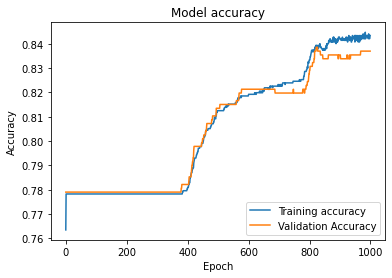

In [17]:
# plot learning curves
plt.plot(histories['model'].history['accuracy'])
plt.plot(histories['model'].history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()